In [3]:
!pip install numpy matplotlib

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl (2.6 MB)


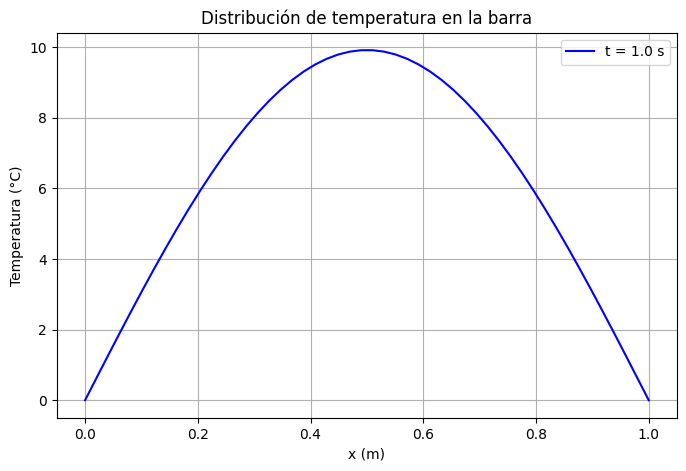

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
alpha = 0.001  # Difusividad térmica (m^2/s)
L = 1.0  # Longitud de la barra (m)
T_izquierda = 0  # Temperatura en el extremo izquierdo (°C)
T_derecha = 0  # Temperatura en el extremo derecho (°C)
tiempo_total = 1.0  # Tiempo total de simulación (s)

# Número de puntos en el espacio
N = 50  # Número de divisiones espaciales
x = np.linspace(0, L, N)
dx = L / (N - 1)  # Tamaño del paso espacial

# Condición inicial: T(x,0) = 10 * sin(pi * x)
T = np.zeros((N, 1000))
T[:, 0] = 10 * np.sin(np.pi * x)
T[0, :] = T_izquierda  # Condición de frontera izquierda
T[-1, :] = T_derecha  # Condición de frontera derecha

# Cálculo de dt con condición de estabilidad CFL
dt = 0.4 * dx**2 / alpha
Nt = int(tiempo_total / dt)
dt = tiempo_total / Nt  # Aseguramos que el tiempo total sea exacto

# Parámetro lambda de la ecuación
lambd = alpha * dt / dx**2

# Método explícito de diferencias finitas
for j in range(0, Nt - 1):
    for i in range(1, N - 1):
        T[i, j+1] = T[i, j] + lambd * (T[i+1, j] - 2*T[i, j] + T[i-1, j])

# Graficar la temperatura en el último instante de tiempo
plt.figure(figsize=(8, 5))
plt.plot(x, T[:, Nt - 1], label=f't = {tiempo_total} s', color='blue')
plt.xlabel("x (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de temperatura en la barra")
plt.legend()
plt.grid()
plt.show()